In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

In [3]:
datasets = [
    make_regression(lambda x: 0.3*x, 200, random_state=0, noise=0.15),
    make_regression(lambda x: np.sin(x*5), 200, random_state=0, noise=0.15),
    make_regression(lambda x: np.exp(x*2), 200, random_state=0, noise=1000.0),
]

In [4]:
def plot_regression_line(clf, xb, yb, n=100):
    xx = np.linspace(*xb, n).reshape(-1, 1)
    yy = clf.predict(xx)
    plt.plot(xx, yy, color='red', linewidth=20, alpha=0.3)

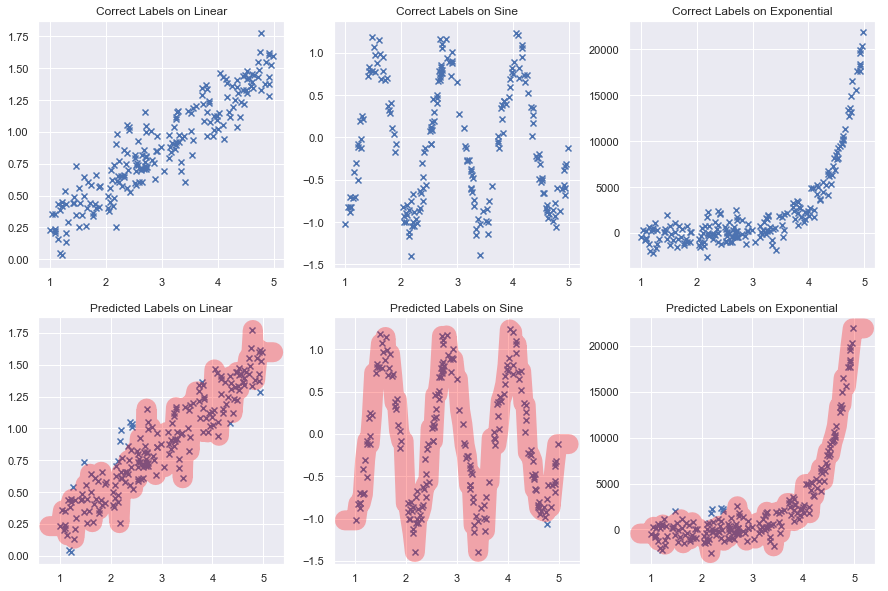

In [5]:
names = ['Linear', 'Sine', 'Exponential']

clfs = []
plt.figure(figsize=(15, 10))
for idx, (ds, name) in enumerate(zip(datasets, names), 1):
    X, y = ds
    clf = DecisionTreeRegressor()
    clf.fit(X, y)
    clfs.append(clf)
    pred = clf.predict(X)
    plt.subplot(2, 3, idx)
    plt.title(f'Correct Labels on {name}')
    plt.scatter(X.ravel(), y, marker='x')
    plt.subplot(2, 3, idx+3)
    plt.title(f'Predicted Labels on {name}')
    plt.scatter(X.ravel(), pred, marker='x')
    plot_regression_line(clf, plt.xlim(), plt.ylim())
plt.show()

In [6]:
sns.reset_orig()

c:\users\snowt\.virtualenv\machine-learning\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
c:\users\snowt\.virtualenv\machine-learning\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


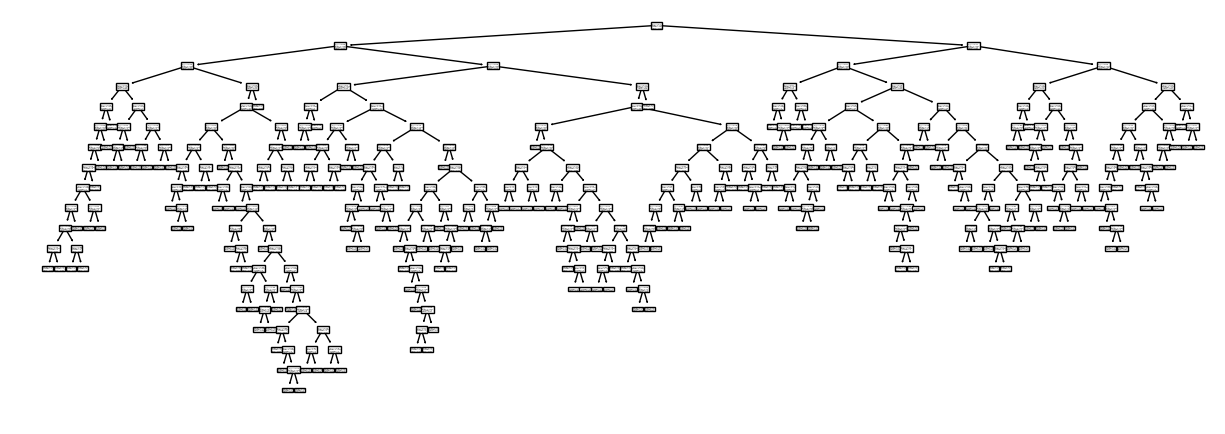

In [7]:
index = 0
plt.figure(figsize=(15, 5))
plt.title(f'Decision Tree on names[index]')
plot_tree(clfs[index])
plt.show()

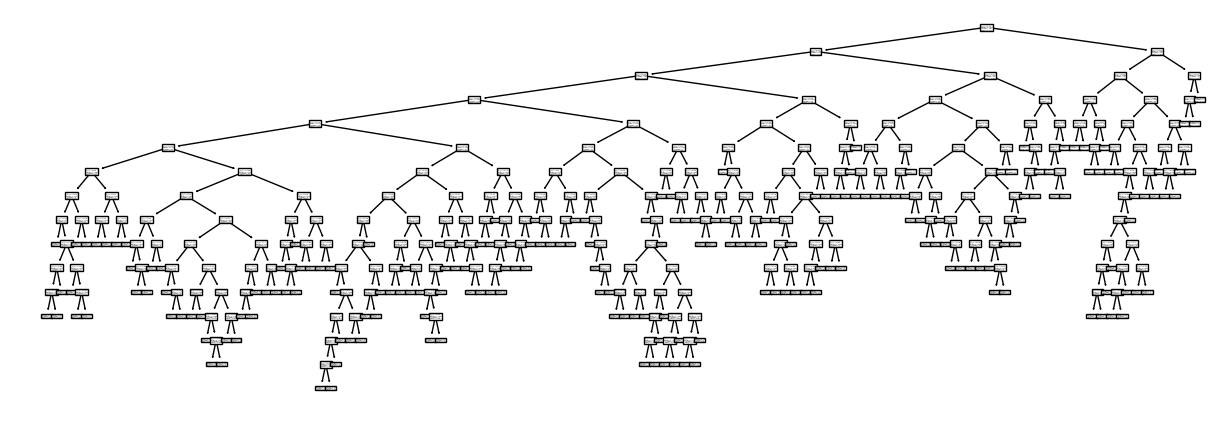

In [8]:
index = 1
plt.figure(figsize=(15, 5))
plt.title(f'Decision Tree on names[index]')
plot_tree(clfs[index])
plt.show()

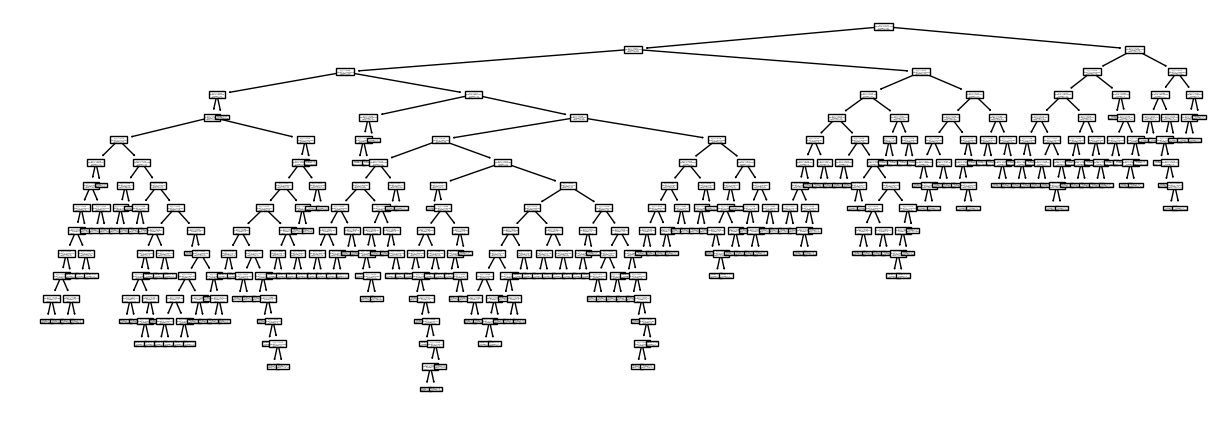

In [9]:
index = 2
plt.figure(figsize=(15, 5))
plt.title(f'Decision Tree on names[index]')
plot_tree(clfs[index])
plt.show()